# Iris Dataset - Exploratory Data Analysis
- Author: Alex Ashtiany
- Date: 10/04/2025
- Environment: Python 3.12 | pandas 2.3.2 | matplotlib 3.10.6 | seaborn 0.13.2

## Objective
- Under the strucutre and relationships within the Iris dataset.
- We'll examine feature distributions, detect duplicates/outliers, and evaluate class seperability before modeling.

### Environment Setup
Ensure required libraries are installed and up to date.

In [ ]:
# Install and upgrade core dependencies
%pip install -q --upgrade pandas matplotlib seaborn plotly ipywidgets nbformat kaleido

In [ ]:
import sys
import sys, subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid", context="notebook")

### Load and Inspect Data

In [ ]:
iris = pd.read_csv('../data/iris.csv')
iris.head()

Check the first few rows to verify column names and data types.

### Summary statistics for numeric features

In [12]:
features = iris.columns.to_list()
features.remove("species")

summary = iris[features].agg(["min", "mean", "median", "max"]).T
summary["dtype"] = iris[features].dtypes.values
summary = summary[["dtype", "min", "mean", "median", "max"]]
summary.round(2)

,dtype,min,mean,median,max
sepal_length,float64,4.3,5.84,5.80,7.9
sepal_width,float64,2.0,3.05,3.00,4.4
petal_length,float64,1.0,3.76,4.35,6.9
petal_width,float64,0.1,1.20,1.30,2.5


All features are numeric. Pertal features show higher spread than sepal features.

### Check for duplicate rows

In [ ]:
mask = iris.duplicated(keep=False)
iris[mask]

Three identical rows found - all Setosa with identical measuerments. We'll drop duplicates

### Feature Distributions (Histograms)

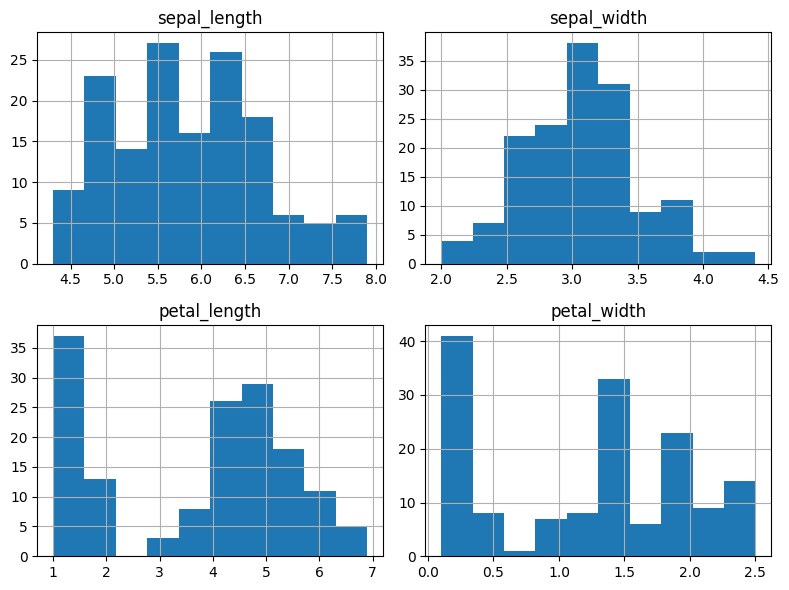

In [ ]:
### Histogram

iris[features].hist(figsize=(8, 6))
plt.tight_layout()
plt.savefig("../reports/figures/01_histograms.png", dpi=120)
plt.show()

Petal features show clear bimodality, indicating class separability. Sepal features overlap.

### Distribution Observations
- Petal length shows a small cluster near 1–2 cm (Setosa group).
- Petal width is positively skewed (~1), with most values below 1.5 cm.
- Sepal length is widely spread; sepal width is narrow.
- A few petal width values near 0.1 cm may be minor outliers.

### Correlation Matrix

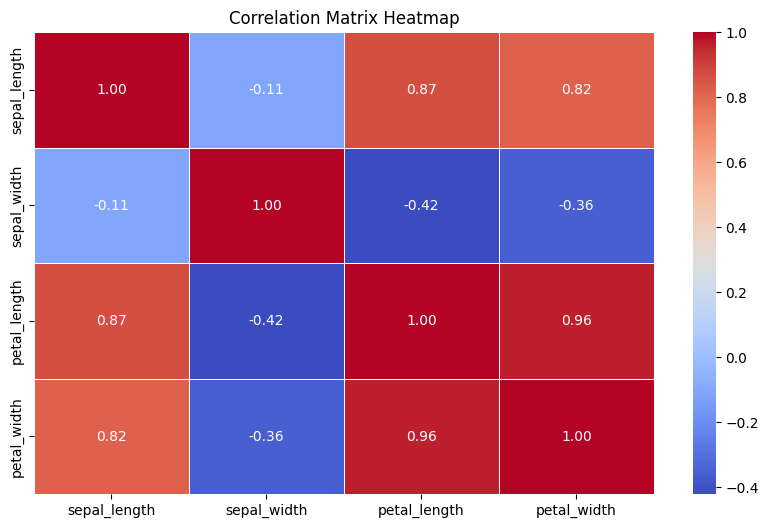

In [ ]:
### Correlation matrix
correlation_matrix = iris.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.savefig("../reports/figures/02_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

### Correlation Observations
- Petal length and petal width are strongly correlated (r ≈ 0.96).  
- Sepal length correlates moderately with both petal length and width (r ≈ 0.82).  
- Sepal width is weakly and negatively correlated with petal features (r ≈ –0.35 to –0.42).  
- High collinearity between petal features suggests potential redundancy for modeling.


### Pairplot: Pairwise Feature Relationships

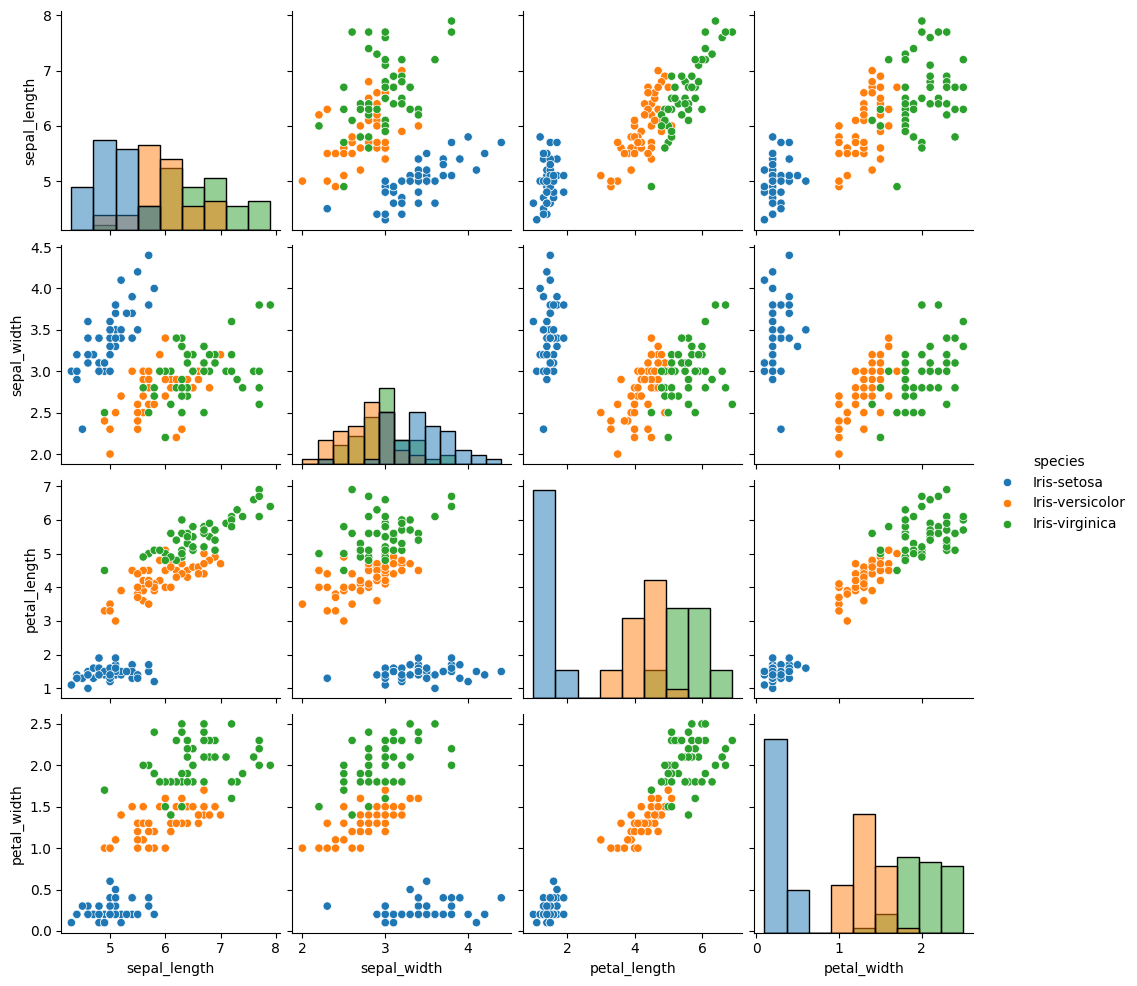

In [14]:
sns.pairplot(iris, hue="species", diag_kind="hist")
plt.savefig("../reports/figures/03_pairplot.png", dpi=120)
plt.show()

Setosa forms a distinct cluser; Versicolor and Virginica overlap partially on petal dimensions.

### Feature Distribution by Species (Violin Plot)

In [6]:
fig = px.violin(
    iris.melt(id_vars="species", value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"]),
    x="species",
    y="value",
    color='species',
    facet_col='variable',
    box=True,
    points='all',
)
fig.write_image("../reports/figures/02_box_by_species.png", scale=2)
fig.show()

Petal length and width give clean class splits. Sepal features overlap.

### 2D Scatter - Sepal vs. Petal Relationships

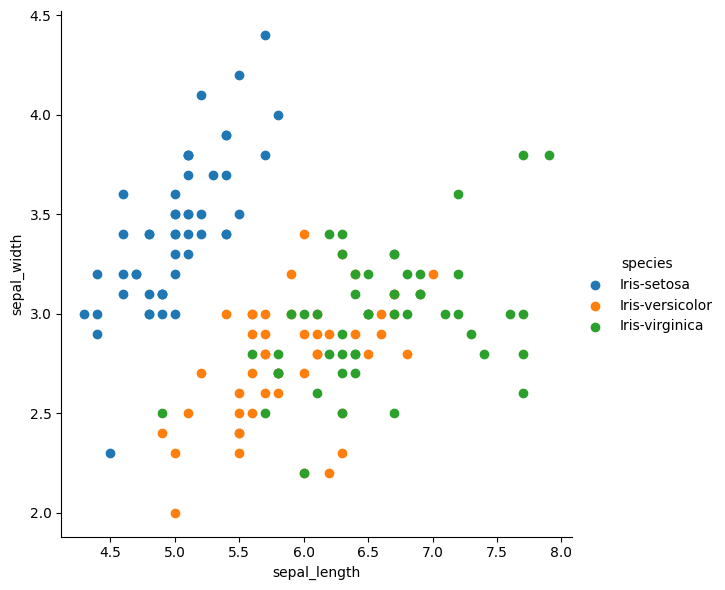

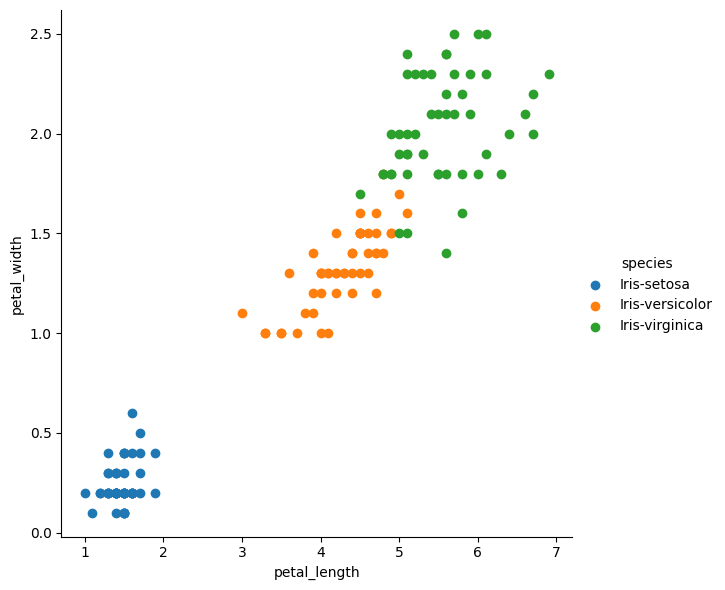

In [7]:
# 2-D Scatter Plot
# Sepal scatter
g1 = sns.FacetGrid(iris, hue="species", height=6)
g1.map(plt.scatter, "sepal_length", "sepal_width").add_legend()

# Petal scatter
g2 = sns.FacetGrid(iris, hue="species", height=6)
g2.map(plt.scatter, "petal_length", "petal_width").add_legend()
g2.savefig("../reports/figures/02_scatter_best_features.png")

### Class Separability Insights
- The petal length vs. petal width scatter provides the clearest class separation.  
  - *Setosa* is completely isolated.  
  - *Versicolor* and *Virginica* show moderate overlap.  
- The greatest misclassification risk lies between *Versicolor* and *Virginica*, especially in sepal-based plots where distributions overlap heavily.  
- Additional data or nonlinear models may improve separation between these two classes.


### Five Insights:
1. Which single feature best separates setosa from the others? Why?
    - Petal Length vs Petal Width. You can see that Setosa's petals mostly are smaller in both width and length.
2. Which pair best separates versicolor vs virginica?
    - They all show some overlap, but the one that shows the best seperation would be petal width vs petal length.
3. Any strong collinearity you must watch (e.g., petal_length vs petal_width)?
    - Sepal Length and Petal Width: 0.82
    - Sepal Length and Petal Length: 0.96

4. Any outliers that could distort scaling or margins?
    - Iris doesn't show any outliers, so scaling transformations won't be distorted and classifiers like logisitc regression or SVM won't suffer from margin collapse. It's a clean dataset.

5. From visuals alone, which model class is likely to work (linear vs margin-based vs neighbor-based) — and why. (Prediction, not proof.)
    - Petal length vs Petal Width: Margin-based models since they can carve out a strong boundary between classes.
    - Sepal length vs Sepal Width: Neighbor-based models, because classes overlap heavily and only local structure can help.